In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score


In [7]:
train= pd.read_csv(r"C:\Users\dhruv\Downloads\ts.csv")

In [125]:
test=pd.read_csv(r"C:\Users\dhruv\Downloads\test.csv")

# Solution wali file

In [126]:
sol=pd.read_csv(r"C:\Users\dhruv\Downloads\solution.csv")

In [13]:
train.head()

,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation
0,1.475229e+09,9/29/2016 12:00:00 AM,23:55:26,48.0,30.46,66.0,177.39,5.438052,06:13:00,18:13:00,1.21
1,1.475229e+09,9/29/2016 12:00:00 AM,23:50:23,48.0,30.46,67.0,176.78,3.244512,06:13:00,18:13:00,1.21
2,1.475229e+09,9/29/2016 12:00:00 AM,23:45:26,48.0,30.46,60.0,158.75,3.330515,06:13:00,18:13:00,1.23
3,1.475228e+09,9/29/2016 12:00:00 AM,23:40:21,48.0,30.46,60.0,137.71,3.272141,06:13:00,18:13:00,1.21
4,1.475228e+09,9/29/2016 12:00:00 AM,23:35:24,48.0,30.46,66.0,104.95,NaN,06:13:00,18:13:00,1.17


In [127]:
train=train.drop(columns="ID")

In [128]:
train.isnull().sum()

UNIXTime                  27
Data                      21
Time                      10
Temperature               10
Pressure                  22
Humidity                   9
WindDirection(Degrees)    10
Speed                     56
TimeSunRise               19
TimeSunSet                19
Radiation                  7
dtype: int64

In [129]:
test.isnull().sum()

ID                         0
UNIXTime                  13
Data                      12
Time                       9
Temperature               16
Pressure                  20
Humidity                  17
WindDirection(Degrees)    10
Speed                     31
TimeSunRise                6
TimeSunSet                 5
dtype: int64

In [130]:
train["UNIXTime"].fillna(train["UNIXTime"].mean(),inplace=True)

In [131]:
test["UNIXTime"].fillna(test["UNIXTime"].mean(),inplace=True)

# This datetime thing..straightaway picked up from the net

In [132]:
train['Time_conv'] =  pd.to_datetime(train['Time'], format='%H:%M:%S')
train['hour'] = pd.to_datetime(train['Time_conv'], format='%H:%M:%S').dt.hour

#Add column 'month'
train['month'] = pd.to_datetime(train['UNIXTime'].astype(int), unit='s').dt.month

#Add column 'year'
train['year'] = pd.to_datetime(train['UNIXTime'].astype(int), unit='s').dt.year

#Duration of Day
train['total_time'] = pd.to_datetime(train['TimeSunSet'], format='%H:%M:%S').dt.hour - pd.to_datetime(train['TimeSunRise'], format='%H:%M:%S').dt.hour
train.head()

,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Radiation,Time_conv,hour,month,year,total_time
0,1.475229e+09,9/29/2016 12:00:00 AM,23:55:26,48.0,30.46,66.0,177.39,5.438052,06:13:00,18:13:00,1.21,1900-01-01 23:55:26,23.0,9,2016,12.0
1,1.475229e+09,9/29/2016 12:00:00 AM,23:50:23,48.0,30.46,67.0,176.78,3.244512,06:13:00,18:13:00,1.21,1900-01-01 23:50:23,23.0,9,2016,12.0
2,1.475229e+09,9/29/2016 12:00:00 AM,23:45:26,48.0,30.46,60.0,158.75,3.330515,06:13:00,18:13:00,1.23,1900-01-01 23:45:26,23.0,9,2016,12.0
3,1.475228e+09,9/29/2016 12:00:00 AM,23:40:21,48.0,30.46,60.0,137.71,3.272141,06:13:00,18:13:00,1.21,1900-01-01 23:40:21,23.0,9,2016,12.0
4,1.475228e+09,9/29/2016 12:00:00 AM,23:35:24,48.0,30.46,66.0,104.95,NaN,06:13:00,18:13:00,1.17,1900-01-01 23:35:24,23.0,9,2016,12.0


In [133]:
test['Time_conv'] =  pd.to_datetime(test['Time'], format='%H:%M:%S')
test['hour'] = pd.to_datetime(test['Time_conv'], format='%H:%M:%S').dt.hour

#Add column 'month'
test['month'] = pd.to_datetime(test['UNIXTime'].astype(int), unit='s').dt.month

#Add column 'year'
test['year'] = pd.to_datetime(test['UNIXTime'].astype(int), unit='s').dt.year

#Duration of Day
test['total_time'] = pd.to_datetime(test['TimeSunSet'], format='%H:%M:%S').dt.hour - pd.to_datetime(test['TimeSunRise'], format='%H:%M:%S').dt.hour
test.head()

,ID,UNIXTime,Data,Time,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,TimeSunRise,TimeSunSet,Time_conv,hour,month,year,total_time
0,19613,1.479469e+09,11/18/2016 12:00:00 AM,01:35:17,48.0,30.43,28.0,158.35,8.006473,06:33:00,17:43:00,1900-01-01 01:35:17,1.0,11,2016,11.0
1,19614,1.479469e+09,11/18/2016 12:00:00 AM,01:30:18,48.0,30.43,30.0,191.27,8.830502,06:33:00,17:43:00,1900-01-01 01:30:18,1.0,11,2016,11.0
2,19615,1.479468e+09,11/18/2016 12:00:00 AM,01:25:20,48.0,30.43,32.0,191.37,7.898511,06:33:00,17:43:00,1900-01-01 01:25:20,1.0,11,2016,11.0
3,19616,1.479468e+09,11/18/2016 12:00:00 AM,01:20:21,48.0,30.44,31.0,175.43,5.737213,06:33:00,17:43:00,1900-01-01 01:20:21,1.0,11,2016,11.0
4,19617,1.479468e+09,11/18/2016 12:00:00 AM,01:15:19,48.0,30.44,30.0,161.55,6.761591,06:33:00,17:43:00,1900-01-01 01:15:19,1.0,11,2016,11.0


In [134]:
train=train.drop(['Data', 'Time', 'TimeSunRise', 'TimeSunSet','Time_conv',],axis=1)
train.head()

,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,Radiation,hour,month,year,total_time
0,1.475229e+09,48.0,30.46,66.0,177.39,5.438052,1.21,23.0,9,2016,12.0
1,1.475229e+09,48.0,30.46,67.0,176.78,3.244512,1.21,23.0,9,2016,12.0
2,1.475229e+09,48.0,30.46,60.0,158.75,3.330515,1.23,23.0,9,2016,12.0
3,1.475228e+09,48.0,30.46,60.0,137.71,3.272141,1.21,23.0,9,2016,12.0
4,1.475228e+09,48.0,30.46,66.0,104.95,NaN,1.17,23.0,9,2016,12.0


In [135]:
test=test.drop(['Data', 'Time', 'TimeSunRise', 'TimeSunSet','Time_conv',],axis=1)
test.head()

,ID,UNIXTime,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,hour,month,year,total_time
0,19613,1.479469e+09,48.0,30.43,28.0,158.35,8.006473,1.0,11,2016,11.0
1,19614,1.479469e+09,48.0,30.43,30.0,191.27,8.830502,1.0,11,2016,11.0
2,19615,1.479468e+09,48.0,30.43,32.0,191.37,7.898511,1.0,11,2016,11.0
3,19616,1.479468e+09,48.0,30.44,31.0,175.43,5.737213,1.0,11,2016,11.0
4,19617,1.479468e+09,48.0,30.44,30.0,161.55,6.761591,1.0,11,2016,11.0


In [136]:
train=train.drop(["UNIXTime"],axis=1)

In [137]:
test=test.drop(["UNIXTime"],axis=1)

# Filling NAN Values

In [139]:
train.isnull().sum()

Temperature               10
Pressure                  22
Humidity                   9
WindDirection(Degrees)    10
Speed                     56
Radiation                  7
hour                      10
month                      0
year                       0
total_time                38
dtype: int64

In [140]:
train.columns

Index(['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)',
       'Speed', 'Radiation', 'hour', 'month', 'year', 'total_time'],
      dtype='object')

In [141]:
cols=["Temperature","Humidity","Radiation","hour","total_time"]
for i in cols:
    train[i].fillna(train[i].mode()[0],inplace=True)
  

In [142]:
cols=["Temperature","Humidity","hour","total_time"]
for i in cols:
    test[i].fillna(test[i].mode()[0],inplace=True)

In [143]:
col=['Pressure','WindDirection(Degrees)','Speed']
for i in col:
    train[i].fillna(train[i].mean(),inplace=True)
    test[i].fillna(test[i].mean(),inplace=True)

In [144]:
train.isnull().sum()

Temperature               0
Pressure                  0
Humidity                  0
WindDirection(Degrees)    0
Speed                     0
Radiation                 0
hour                      0
month                     0
year                      0
total_time                0
dtype: int64

In [145]:
train=train.drop(["year"],axis=1)


In [146]:
test=test.drop(["year"],axis=1)

In [147]:
train=train[['Temperature', 'Pressure', 'Humidity', 'WindDirection(Degrees)','Speed',  'hour', 'month', 'total_time','Radiation']]

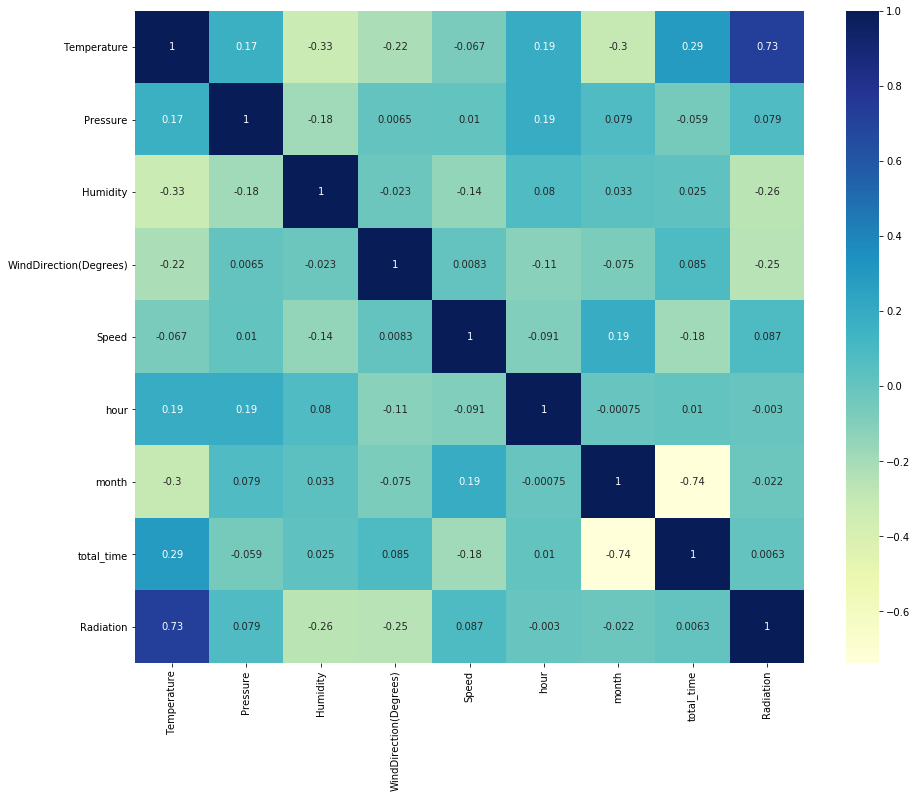

In [49]:
plt.subplots(figsize=(15,12))
sns.heatmap(train.corr(),annot=True, cmap="YlGnBu")

### Temperature has a high correlation w radiation

# Skew of target variable

Text(0.5, 1.0, 'Radiation')

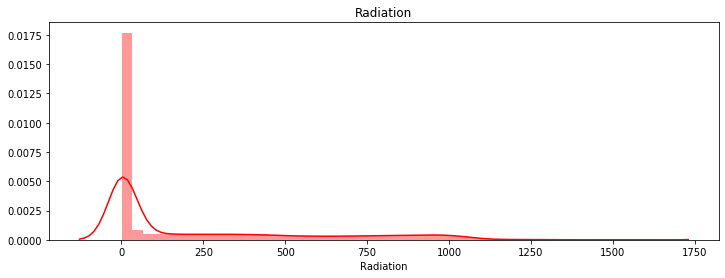

In [50]:
f= plt.figure(figsize=(12,4))

ax=f.add_subplot(111)
sns.distplot(train["Radiation"],bins=50,color='r',ax=ax)
ax.set_title('Radiation')


# Standardizing

In [148]:
from sklearn.preprocessing import StandardScaler
r_scaler= StandardScaler()
train["Radiation"]=r_scaler.fit_transform(train[["Radiation"]])

train.head()

,Temperature,Pressure,Humidity,WindDirection(Degrees),Speed,hour,month,total_time,Radiation
0,48.0,30.46,66.0,177.39,5.438052,23.0,9,12.0,-0.677882
1,48.0,30.46,67.0,176.78,3.244512,23.0,9,12.0,-0.677882
2,48.0,30.46,60.0,158.75,3.330515,23.0,9,12.0,-0.677822
3,48.0,30.46,60.0,137.71,3.272141,23.0,9,12.0,-0.677882
4,48.0,30.46,66.0,104.95,5.949330,23.0,9,12.0,-0.678002


# Score using all variables

In [149]:
from sklearn.model_selection import train_test_split


In [182]:
x=train.drop(["Radiation"],axis=1)
y=train["Radiation"]
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)

In [183]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
result_lr=r2_score(y_test,y_pred)
print(result_lr)

0.6162149927312734


# Finding important features

In [151]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
# configure to select all features
fs = SelectKBest(score_func=f_regression, k='all')
# learn relationship from training data
fs.fit(x_train, y_train)
# transform train input data
X_train_fs = fs.transform(x_train)



Feature 0: 15237.047384
Feature 1: 95.033514
Feature 2: 1010.372248
Feature 3: 972.495347
Feature 4: 102.087652
Feature 5: 0.786466
Feature 6: 5.403727
Feature 7: 0.231619


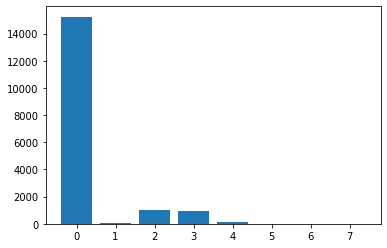

In [152]:
# what are scores for the features
for i in range(len(fs.scores_)):
	print('Feature %d: %f' % (i, fs.scores_[i]))
# plot the scores
plt.bar([i for i in range(len(fs.scores_))], fs.scores_)
plt.show()

### According to the graph last three features aren't that important but i tried by dropping them and it lowers the score, so eventually i included all the features

# Linear Regression

In [184]:
x=train.iloc[:,0:8]
y=train.iloc[:,8]

In [185]:
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.3,random_state=1)
lr=LinearRegression()
lr.fit(x_train,y_train)
y_pred=lr.predict(x_test)
result_lr=r2_score(y_test,y_pred)
print(result_lr)

0.6162149927312734


In [186]:
submission = pd.DataFrame()
submission['ID'] = test.ID

In [189]:
feats = test.iloc[:,1:9]

In [190]:
predictions = lr.predict(feats)

In [191]:
submission["Radiation"]=predictions

In [192]:
submission.head()

,ID,Radiation
0,19613,-0.024263
1,19614,-0.027308
2,19615,-0.053574
3,19616,-0.117352
4,19617,-0.074479


# Standardized the solutions column here 

In [209]:
t_scaler= StandardScaler()
sol["Radiation"]=r_scaler.fit_transform(sol[["Radiation"]])

sol.tail(10)

,ID,Radiation
13064,32677,-0.615786
13065,32678,-0.615821
13066,32679,-0.615821
13067,32680,-0.615751
13068,32681,-0.615856
13069,32682,-0.615717
13070,32683,-0.615891
13071,32684,-0.615786
13072,32685,-0.615682
13073,32686,-0.615786


In [193]:
y1=sol["Radiation"]
y2=submission["Radiation"]

# Score

In [194]:
print(r2_score(y1,y2))

0.5940043740283003


# Random forest regressor

In [195]:
from sklearn.ensemble import RandomForestRegressor 
yo=[1000]

for i in yo:
    regressor = RandomForestRegressor(n_estimators = i, random_state = 0) 
    regressor.fit(x_train, y_train)   
    rf_pred = regressor.predict(x_test)
    result_rf=r2_score(y_test,rf_pred)
    print(result_rf)

0.894456661652268


In [196]:
predictions = regressor.predict(feats)

In [197]:
submission["Radiation"]=predictions
submission.head(20)

,ID,Radiation
0,19613,-0.677856
1,19614,-0.677856
2,19615,-0.677856
3,19616,-0.677856
4,19617,-0.677856


In [198]:
y1=sol["Radiation"]
y2=submission["Radiation"]

# Score

In [199]:
print(r2_score(y1,y2))

0.7979293582935192


# AdaBoost Regressor

In [200]:
from sklearn.ensemble import AdaBoostRegressor
from sklearn.model_selection import GridSearchCV

In [201]:
ada=AdaBoostRegressor(learning_rate= 0.001, n_estimators= 500, random_state=1)

In [202]:
ada.fit(x_train,y_train)
ab_pred=ada.predict(x_test)
result_ab=r2_score(y_test,ab_pred)
result_ab

0.7014523527066008

In [204]:
predictions = ada.predict(feats)

In [210]:
submission["Radiation"]=predictions
submission.tail()

,ID,Radiation
13069,32682,-0.671090
13070,32683,-0.671090
13071,32684,-0.671090
13072,32685,-0.671090
13073,32686,0.422608


# Score

In [211]:
y1=sol["Radiation"]
y2=submission["Radiation"]
print(r2_score(y1,y2))

0.678353489467139


# XGBoost Regressor

In [212]:
import xgboost as xgb

In [213]:
xg_reg = xgb.XGBRegressor(objective ='reg:linear', colsample_bytree = 0.3, learning_rate = 0.1,
                max_depth = 3, alpha = 10, n_estimators = 1000)

In [214]:
xg_reg.fit(x_train,y_train)
xgb_pred = xg_reg.predict(x_test)
result_xgb=r2_score(y_test,xgb_pred)
result_xgb

[17:54:02] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.
[17:54:03] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.1.0/src/objective/regression_obj.cu:170: reg:linear is now deprecated in favor of reg:squarederror.


0.8709454015121116

In [215]:
predictions = xg_reg.predict(feats)
submission["Radiation"]=predictions
submission.head()

,ID,Radiation
0,19613,-0.729682
1,19614,-0.709795
2,19615,-0.723068
3,19616,-0.707673
4,19617,-0.720232


# Final Score

In [216]:
y1=sol["Radiation"]
y2=submission["Radiation"]
print(r2_score(y1,y2))

0.809444045741862
